**PREDICTING THE PERCENTAGE OF STUDENTS BASED ON THE NUMBER OF STUDY HOURS USING LINEAR REGRESSION**

Let's start by importing all the libraries we'll need for this

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Let's read the data(csv file) using pandas
my_data = pd.read_csv('/content/student_scores - student_scores.csv')
my_data.head(7)  ## checking the first 7 inputs

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


Let's try plotting this data distribution using matplotlib, we might see a pattern

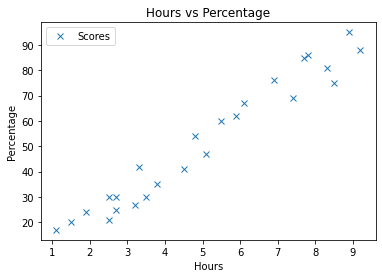

In [3]:
my_data.plot(x='Hours', y='Scores', style='x')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.show()

In [4]:
print(my_data.loc[my_data['Hours']==9.2])

   Hours  Scores
6    9.2      88


Before we prepare the data let's try to visualize this data differently

The relation Matrix


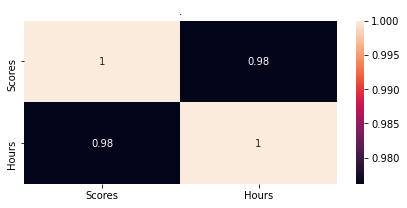

In [5]:
plt.figure(figsize=(7,3))
sns.heatmap(my_data[['Scores','Hours']].corr(), annot = True)
plt.title('.', fontsize = 10)
print('The relation Matrix')
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


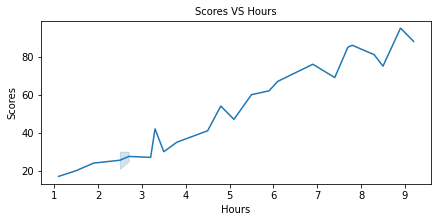

In [6]:
plt.figure(figsize=(7,3))
sns.lineplot(my_data['Hours'],my_data['Scores'], palette = "Set3")
plt.title('Scores VS Hours', fontsize = 10)
plt.show()

This is much easier to understand

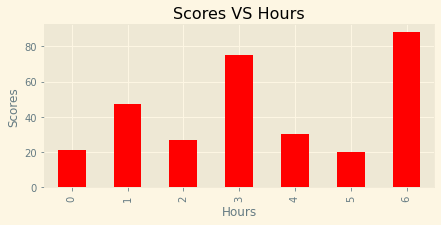

In [7]:
plt.style.use('Solarize_Light2') 
plt.figure(figsize = (7,3))
my_data['Scores'].head(7).plot.bar(color = 'red')
plt.title('Scores VS Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


Now let's import all the libraries we'll need for preparing the data and training the model

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [9]:
#let's split the data into x and y
X = my_data.iloc[:, :-1].values  
y = my_data.iloc[:, 1].values

In [10]:
#defining training and testing sets ## we'll let the test size be equal to 0.1
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 69)

Let's begin the training

In [11]:
algo  = LinearRegression() ##setting the algorithm to linear regression
algo.fit(X_train,y_train)
pred = algo.predict(X_test)

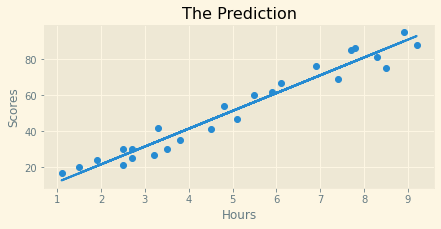

In [12]:
plt.figure(figsize=(7,3))
reg = algo.coef_*X+algo.intercept_
plt.scatter(X, y)
plt.plot(X, reg)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("The Prediction")
plt.show()



In [13]:
#let's check out the mean absolute error and max error of this model
from sklearn.metrics import max_error, mean_absolute_error
print('The Maximum Error: '+str(max_error(y_test, pred)))
print('Mean Absolute Error : '+str(mean_absolute_error(y_test, pred)))

The Maximum Error: 6.0098818663363005
Mean Absolute Error : 4.773328390774336


In [14]:
##just to see how close we are
y_pred = algo.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,69,75.009882
1,67,62.150394
2,30,26.539503


And now, let's predict for 9.25hrs/day

In [15]:
hours = 9.25
scores = algo.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(scores[0]))

No of Hours = 9.25
Predicted Score = 93.30992283754915


###**Result and Evaluation**

With the given data we can see that, for the most part as the number of hours increased, so did the score, although some exceptions did exist, some scored high with low study hours and some scored low with high study hours, some even after studying 9+ hours.

The result could be because the students might've been burnt out due to long study sessions and scored low, on the other hand some could focus better with shorter study sessions.

With this I conclude my analysis of student scores based on the hours they've studied.